In [1]:
import particle_in_a_box as pib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from typing import List

lightColor = "#8bb1cc"
darkColor = "#0f4c75"

plt.rcParams["text.usetex"] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Dejavu Serif'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'

In [12]:
gamma = 0.00001
L = np.pi
m = 1

myState = pib.Particle_in_Box_State("symmetric", L, m, [2, 3], [1, 1], gamma)

neumann_state = pib.Particle_in_Box_State("neumann", L, m, [2, 3], [1, 1])



In [10]:
print(myState.new_k_space_wavefunction(4, 0))
print(neumann_state.new_k_space_wavefunction(4, 0))


(2.3881636045574385e-07-0.2572334731341331j)
[0.-0.25723323j]


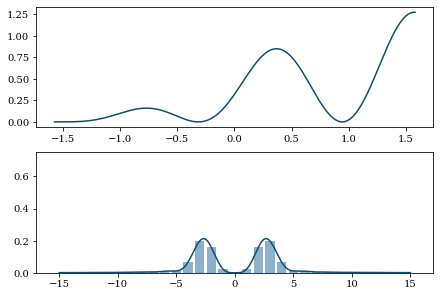

In [13]:
# Create Plot only
x = np.arange(-L/2, L/2+0.01, 0.01)
nb = 15
n = np.arange(-nb, nb+1, 1)
kn = n*np.pi/L
k = np.arange(-nb, nb+0.01, 0.01)*np.pi/L


x_space_wavefunc = myState.x_space_wavefunction
k_space_wavefunc = myState.k_space_wavefunction
new_k_space_wavefunc = myState.new_k_space_wavefunction

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1,1])
k_distr_plot = fig.add_subplot(gs[1,0])
x_distr_plot = fig.add_subplot(gs[0, 0])

k_distr_plot.set_ylim([0, 0.75])


k_lines = k_distr_plot.plot(k, np.abs(k_space_wavefunc(k, 0))**2, animated=True, color = darkColor)
x_lines = x_distr_plot.plot(x, np.abs(x_space_wavefunc(x, 0))**2, animated=True, color = darkColor)
k_bars = k_distr_plot.bar(kn, np.abs(new_k_space_wavefunc(n, 0))**2, animated=True, color = lightColor)

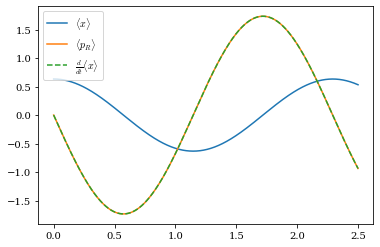

In [4]:
# Expectation Value Graphs

myState.gamma = 20
x_exp_val = myState._xsp._expectation_value
k_exp_val = myState._ksp._expectation_value
x_derif = myState._xsp._exp_t_deriv

t = np.arange(0, 2.5, 0.00001)

plt.plot(t, x_exp_val(t), label=r"$\langle x \rangle$")
plt.plot(t, k_exp_val(t), label=r"$\langle p_R \rangle$")
plt.plot(t, x_derif(t), ls="--",label=r"$\frac{d}{dt} \langle x \rangle$")
plt.legend()

auto setting time to:  2.5132741228718345


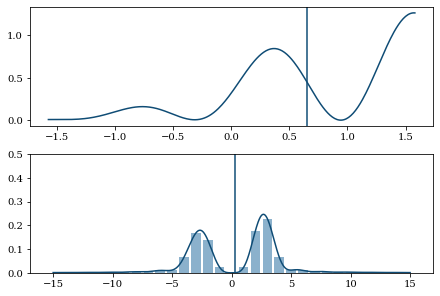

In [16]:
# Create Animations
myState.case = "neumann"

x_space_wavefunc = myState.x_space_wavefunction
k_space_wavefunc = myState.k_space_wavefunction
new_k_space_wavefunc = myState.new_k_space_wavefunction
x_exp_val = myState._xsp._expectation_value
k_exp_val = myState._ksp._expectation_value

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1,1])
kDistrPlot = fig.add_subplot(gs[1,0])
xDistrPlot = fig.add_subplot(gs[0, 0])

kDistrPlot.set_ylim([0, 0.5])

k_lines = kDistrPlot.plot(k, np.abs(k_space_wavefunc(k, 0))**2, animated=True, color = darkColor)
x_lines = xDistrPlot.plot(x, np.abs(x_space_wavefunc(x, 0))**2, animated=True, color = darkColor)
k_bars = kDistrPlot.bar(kn, np.abs(new_k_space_wavefunc(kn, 0))**2, animated=True, color = lightColor)
x_exp_line = xDistrPlot.axvline(x_exp_val(0), animated=True, color = darkColor)
k_exp_line = kDistrPlot.axvline(k_exp_val(0), animated=True, color = darkColor)

fps = 20
time = 0.5
speed = 1
if myState._sp._num_energy_states == 2:
    time = 2*np.pi/abs(myState._esp._energies[0]-myState._esp._energies[1])/speed
    print("auto setting time to: ", time)

time_per_frame = 1/fps*speed
num_frames = time*fps

def init():
    return x_lines + k_lines + [x_exp_line] + [k_exp_line] + list(k_bars)

def animate(i):
    x_lines[0].set_data(x, np.abs(x_space_wavefunc(x, time_per_frame*i))**2)
    k_lines[0].set_data(k, np.abs(k_space_wavefunc(k, time_per_frame*i))**2)
    x_ev = x_exp_val(time_per_frame*i)
    k_ev = k_exp_val(time_per_frame*i)
    x_exp_line.set_data([x_ev, x_ev],[0,1])
    k_exp_line.set_data([k_ev, k_ev],[0,1])

    for bar, h in zip(k_bars, np.abs(new_k_space_wavefunc(kn, i*time_per_frame))**2):
        bar.set_height(h)
    return x_lines + k_lines + [x_exp_line] + [k_exp_line] + list(k_bars)

anim = FuncAnimation(fig, animate, init_func=init, frames=int(num_frames), interval=int(1/fps*1000), blit=True)
anim


In [ ]:
class Some_properties:
    def __init__(self, p1, p2):
        self._p1 = p1
        self._p2 = p2
    
    def __str__(self):
        return "p1: " + str(self._p1) + ", p2: " + str(self._p2)

class Composition:
    def __init__(self, props: Some_properties):
        self._props = props
    
    def print_props(self):
        print(self._props)

class Master:
    def __init__(self, p1, p2):
        self._master_props = Some_properties(p1, p2)
        self._has_a = Composition(self._master_props)

    def manip_props(self, v1, v2):
        self._master_props._p1 = v1
        self._master_props._p2 = v2



master = Master(1, 2)
master._has_a.print_props()
master.manip_props(3, 4)
master._has_a.print_props()
    

In [35]:
from __future__ import annotations

class number:
    def __init__(self, num: int) -> None:
        self.eq_called = 0
        self.n = num

    def __add__(self, other: number) -> number:
        return number(self.n + other.n)

    def __sub__(self, other: number) -> number:
        return self + (-1)*other

    def __mul__(self, other: number | int) -> number:
        if isinstance(other, int):
            return number(self.n*other)
        elif isinstance(other, number):
            return number(self.n * other.n)

    def __neg__(self) -> number:
        return self*(-1)


    def __rmul__(self, other: number | int) -> number:
        return self.__mul__(other)

    def __str__(self) -> str:
        return str(self.n)

    def __eq__(self, other: number | int) -> bool:
        self.eq_called += 1
        if isinstance(other, number):
            return self.n == other.n
        elif isinstance(other, int):
            return self.n == other
    

n1 = number(1)
n2 = number(2)

n3 = n1 - n2
print(n3)

-1


In [45]:
n1.eq_called = 0

if n1 == 1:
    print("is one")
elif n1 == 2:
    print("is tow")

n1.eq_called

is one


1

In [5]:
state = pib.Particle_in_Box_State("dirichlet", np.pi, 1, [], [])
state.add_state(1, 1)
state._sp.energy_states

[1]